# Tugas Akhir Big Data
## Ridho Diaz Pranantyo
## 2320506024

Import Package yang diperlukan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

Menampilkan Dataset

In [ ]:
file_path = '/content/data.csv'

df = pd.read_csv(file_path)

print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (1033576, 7)


Menampilkan kolom dengan missing values

In [ ]:
missing_values = df.isnull().sum()

missing_columns = missing_values[missing_values > 0]

print("Nama kolom dengan missing values beserta jumlahnya:")
print(missing_columns)

Nama kolom dengan missing values beserta jumlahnya:
title                 2
genres           100974
averageRating    592030
numVotes         592030
releaseYear      129184
dtype: int64


Cleaning dan Normalisasi Data

In [ ]:
df = df.dropna()

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Jumlah baris dan kolom setelah penghapusan missing values dan normalisasi:", df.shape)


Jumlah baris dan kolom setelah penghapusan missing values dan normalisasi: (426599, 7)


<ipython-input-50-adfc02e4ae71>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


## Visualisasi Data

Histogram Distribusi Average Rating

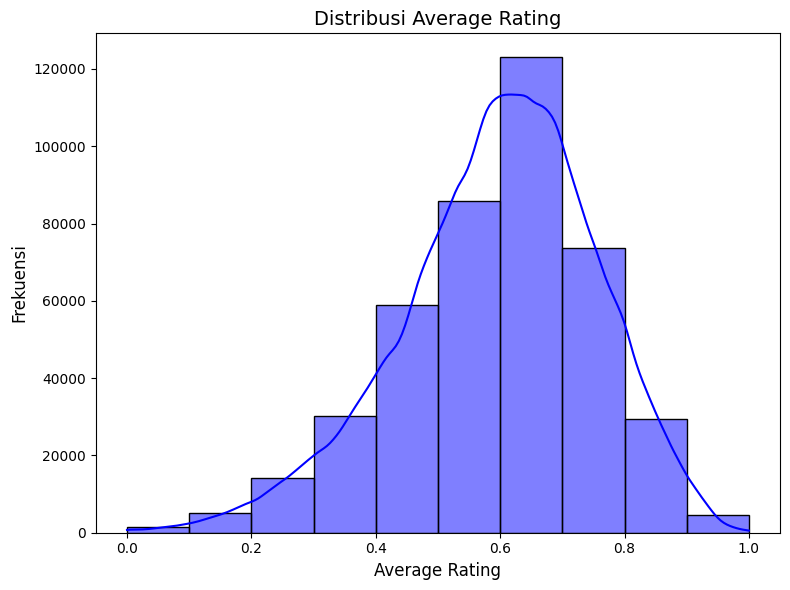

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['averageRating'].dropna(), bins=10, kde=True, color="blue")
plt.title("Distribusi Average Rating", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.tight_layout()
plt.show()



Korelasi Antar Kolom Numerik

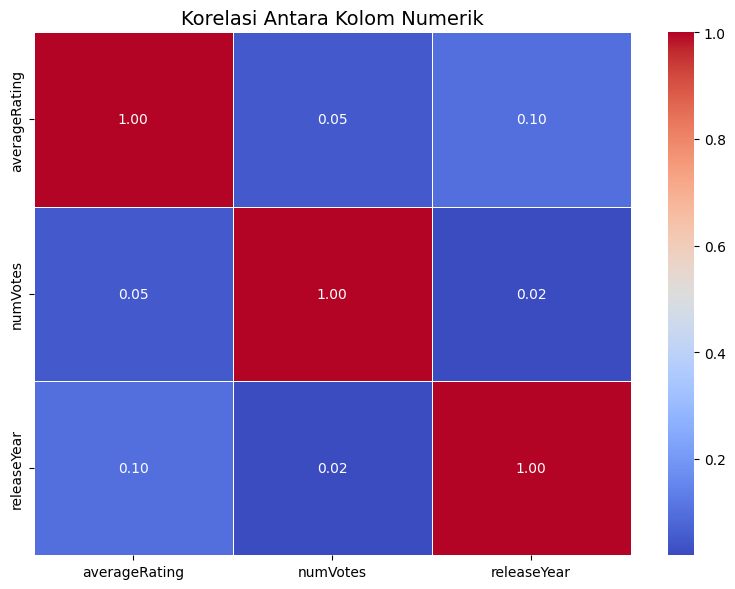

In [ ]:
correlation_matrix = df[['averageRating', 'numVotes', 'releaseYear']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antara Kolom Numerik", fontsize=14)
plt.tight_layout()
plt.show()


## Machine Learning Random Forest

Membuat label kolom rating untuk memisahkan rating tinggi (1) dan rendah (0)

In [ ]:
df['label'] = (df['averageRating'] > 0.60).astype(int)
print(df['label'].value_counts())


label
1    230597
0    196002
Name: count, dtype: int64


Melatih Model Random Forest dan LogisticRegression Menggunakan Cross Validation untuk mencari hasil yang terbaik

In [ ]:
X = df[['numVotes', 'releaseYear']]
y = df['label']


xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
xTrainResampled, yTrainResampled = smote.fit_resample(xTrain, yTrain)


scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrainResampled)
xTestScaled = scaler.transform(xTest)


rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


rf.fit(xTrainScaled, yTrainResampled)
yPredRF = rf.predict(xTestScaled)


print("\nLaporan Klasifikasi (Random Forest):")
print(classification_report(yTest, yPredRF))


cv_score_rf = cross_val_score(rf, xTrainScaled, yTrainResampled, cv=5, scoring='accuracy')
print("\nCross Validation Score (Random Forest):", cv_score_rf)



Laporan Klasifikasi (Random Forest):
              precision    recall  f1-score   support

           0       0.54      0.49      0.52     39156
           1       0.60      0.64      0.62     46164

    accuracy                           0.57     85320
   macro avg       0.57      0.57      0.57     85320
weighted avg       0.57      0.57      0.57     85320


Cross Validation Score (Random Forest): [0.57039065 0.57119813 0.56862267 0.57012728 0.60291706]


Kontribusi tiap fitur pada klasifikasi random forest dan visualisasinya


Kontribusi Fitur:
       Feature  Importance
0     numVotes    0.830463
1  releaseYear    0.169537


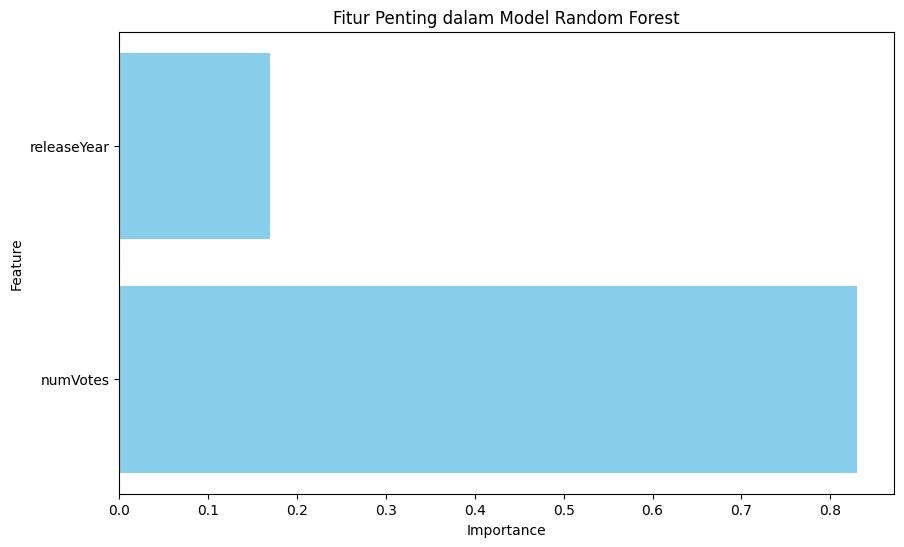

In [ ]:
feature_importances = rf.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print("\nKontribusi Fitur:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Fitur Penting dalam Model Random Forest')
plt.show()

## Link Dataset

[Kaggle Dataset](https://www.kaggle.com/datasets/octopusteam/full-imdb-dataset)